In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 11, 8

In [3]:
def fill_nan(table):
    for col in table.columns:
        table[col] = table[col].fillna(table[col].median())
    return table

In [21]:
data = pd.read_csv("C:\\Users/andre/Downloads/credit_scoring_sample.csv/credit_scoring_sample.csv")

In [22]:
data

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0
...,...,...,...,...,...,...,...,...
45058,1,31,0,0.824725,0,0,3000.0,1.0
45059,0,49,0,6530.000000,0,0,0.0,5.0
45060,1,38,0,0.475841,0,0,3000.0,2.0
45061,0,47,1,0.485198,0,0,11720.0,5.0


In [8]:
data.isnull().sum()

SeriousDlqin2yrs                           0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfTimes90DaysLate                    0
NumberOfTime60-89DaysPastDueNotWorse       0
MonthlyIncome                           8643
NumberOfDependents                      1117
dtype: int64

Distribution of the target: 


0    0.777511
1    0.222489
Name: SeriousDlqin2yrs, dtype: float64

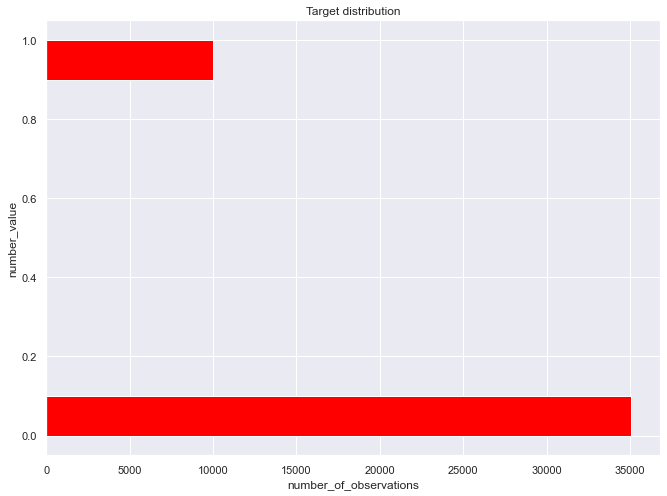

In [18]:
ax = data['SeriousDlqin2yrs'].hist(orientation='horizontal',color='red')
ax.set_xlabel('number_of_observations')
ax.set_ylabel('number_value')
ax.set_title('Target distribution')

print("Distribution of the target: ")
data['SeriousDlqin2yrs'].value_counts() / data.shape[0]

In [19]:
independent_columns_names = [x for x in data if x != "SeriousDlqin2yrs"]
independent_columns_names

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

In [23]:
table = fill_nan(data)

In [74]:
X = table[independent_columns_names]
y = table['SeriousDlqin2yrs']

In [ ]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [26]:
lr = LogisticRegression(random_state=5, class_weight='balanced',)

In [32]:
parameters = {
    "C":(0.0001,0.001,0.01,0.1,1,10)
}

In [28]:
skf = StratifiedKFold(n_splits=5, shuffle=True ,random_state=5)

In [37]:
search = GridSearchCV(lr,parameters,n_jobs=-1,scoring='roc_auc',cv=skf)

In [38]:
search.fit(X,y)

c:\users\andre\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=5),
             n_jobs=-1, param_grid={'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)},
             scoring='roc_auc')

In [39]:
search.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced', random_state=5)

In [40]:
GridSearchCV?

In [55]:
search.cv_results_['std_test_score'][1]

0.008137559189742445

In [56]:
search.best_score_

0.8089120626797153

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
stSc = StandardScaler()

In [75]:
X_scaler = stSc.fit_transform(X)

In [76]:
cls = LogisticRegression(C=0.001,random_state=5,class_weight='balanced')

In [77]:
cls.fit(X_scaler,y)

LogisticRegression(C=0.001, class_weight='balanced', random_state=5)

In [84]:
features = pd.DataFrame({
    "feat":independent_columns_names,
    "coef":cls.coef_.flatten().tolist()
})

In [94]:
features.sort_values(by='coef')

,feat,coef
0,age,-0.416702
5,MonthlyIncome,-0.163146
2,DebtRatio,-0.024096
6,NumberOfDependents,0.101443
4,NumberOfTime60-89DaysPastDueNotWorse,0.193558
3,NumberOfTimes90DaysLate,0.516788
1,NumberOfTime30-59DaysPastDueNotWorse,0.723427


In [95]:
search.cv_results_

{'mean_fit_time': array([0.10442429, 0.11935048, 0.18927479, 0.2134531 , 0.21399302,
        0.17585635]),
 'std_fit_time': array([0.00640664, 0.0150509 , 0.01288848, 0.01083082, 0.02073458,
        0.03728194]),
 'mean_score_time': array([0.00472164, 0.00526371, 0.00958328, 0.00795598, 0.00414214,
        0.00059805]),
 'std_score_time': array([0.00626707, 0.00572069, 0.00740144, 0.00699152, 0.00606841,
        0.0011961 ]),
 'param_C': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10}],
 'split0_test_score': array([0.66974921, 0.71395256, 0.77306562, 0.78494645, 0.78567344,
        0.78570718]),
 'split1_test_score': array([0.66377197, 0.70777426, 0.77318942, 0.78875624, 0.79032645,
        0.79047419]),
 'split2_test_score': array([0.66568896, 0.71237059, 0.77487951, 0.789

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=42,class_weight='balanced')

In [99]:
param = {
    "max_depth":[1,2,4],
    "min_samples_leaf":[3,5,7,9],
    "max_depth":[5,10,15]
}

In [100]:
forest_search = GridSearchCV(rf,param,cv=skf,scoring='roc_auc')

In [101]:
forest_search.fit(X_scaler,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [3, 5, 7, 9]},
             scoring='roc_auc')

In [120]:
forest_search.best_score_-search.best_score_

0.04753913479617189

In [121]:
forest_search.best_score_

0.835494535641074

In [122]:
search.best_score_

0.7879554008449021

In [106]:
forest_search.best_estimator_.feature_importances_

array([0.11683415, 0.29750096, 0.07587589, 0.28068052, 0.15671683,
       0.05772219, 0.01466946])

In [112]:
feature_rf = pd.DataFrame({
    "index":independent_columns_names,
    "features":forest_search.best_estimator_.feature_importances_
})

In [114]:
feature_rf.sort_values(by='features')

,index,features
6,NumberOfDependents,0.014669
5,MonthlyIncome,0.057722
2,DebtRatio,0.075876
0,age,0.116834
4,NumberOfTime60-89DaysPastDueNotWorse,0.156717
3,NumberOfTimes90DaysLate,0.280681
1,NumberOfTime30-59DaysPastDueNotWorse,0.297501


In [118]:
independent_columns_names[np.argmax(forest_search.best_estimator_.feature_importances_)]

'NumberOfTime30-59DaysPastDueNotWorse'

In [123]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [124]:
parametrs = {
    "max_features": [2, 3, 4],
    "max_samples": [0.5, 0.7, 0.9],
    "base_estimator__C": [0.0001, 0.001, 0.01, 1, 10, 100]
}

In [132]:
clf_bagg = BaggingClassifier(LogisticRegression(class_weight='balanced'),random_state=42,n_estimators=100,n_jobs=-1)

In [133]:
bagg_search = RandomizedSearchCV(clf_bagg,parametrs,cv=skf,scoring='roc_auc',n_iter=20,random_state=1,n_jobs=-1,verbose=True)

In [129]:
%%time
bagg_search.fit(X_scaler,y)

Wall time: 5min 56s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
                   estimator=BaggingClassifier(base_estimator=LogisticRegression(C=0.001,
                                                                                 class_weight='balanced',
                                                                                 random_state=42),
                                               n_estimators=100,
                                               random_state=42),
                   n_iter=20,
                   param_distributions={'base_estimator__C': [0.0001, 0.001,
                                                              0.01, 1, 10,
                                                              100],
                                        'max_features': [2, 3, 4],
                                        'max_samples': [0.5, 0.7, 0.9]},
                   scoring='roc_auc')

In [134]:
%%time
bagg_search.fit(X_scaler,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 4min 25s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
                   estimator=BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced'),
                                               n_estimators=100, n_jobs=-1,
                                               random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'base_estimator__C': [0.0001, 0.001,
                                                              0.01, 1, 10,
                                                              100],
                                        'max_features': [2, 3, 4],
                                        'max_samples': [0.5, 0.7, 0.9]},
                   random_state=1, scoring='roc_auc', verbose=True)

In [131]:
bagg_search.best_score_

0.806056622860693

In [135]:
bagg_search.best_score_

0.8058475775018359

In [136]:
bagg_search.best_estimator_.max_features

2

In [137]:
bagg_search.best_estimator_.max_samples

0.7